# Principal Component Analysis

Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.

Dimensions are nothing but features that represent the data. For example, A 28 X 28 image has 784 picture elements (pixels) that are the dimensions or features which together represent that image.

One important thing to note about PCA is that it is an Unsupervised dimensionality reduction technique, you can cluster the similar data points based on the feature correlation between them without any supervision (or labels), and you will learn how to achieve this practically using Python in later sections of this tutorial!

One important thing to note about PCA is that it is an Unsupervised dimensionality reduction technique, you can cluster the similar data points based on the feature correlation between them without any supervision (or labels).
PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components. Features, Dimensions, and Variables are all referring to the same thing in this notebook. 


#### Main usage of PCA
* Data Visualization
When working on any data related problem, extensive data exploration like finding out how the variables are correlated or understanding the distribution of a few variables is crucial. Considering that there are a large number of variables or dimensions along which the data is distributed, visualization can be a challenge and almost impossible. Using dimensionality reduction, data can be projected into a lower dimension, thereby allowing you to visualize the data in a 2D or 3D space.


* Speeding Machine Learning Algorithm
Since PCA's main idea is dimensionality reduction, you can leverage that to speed up your machine learning algorithm's training and testing time considering your data has a lot of features, and the ML algorithm's learning is too slow.

#### Principal Component
Principal components are the key to PCA; they represent what's underneath the hood of your data. In a layman term, when the data is projected into a lower dimension (assume three dimensions) from a higher space, the three dimensions are nothing but the three Principal Components that captures (or holds) most of the variance (information) of your data.

Principal components have both direction and magnitude. The direction represents across which principal axes the data is mostly spread out or has most variance and the magnitude signifies the amount of variance that Principal Component captures of the data when projected onto that axis. The principal components are a straight line, and the first principal component holds the most variance in the data. Each subsequent principal component is orthogonal to the last and has a lesser variance. In this way, given a set of x correlated variables over y samples you achieve a set of u uncorrelated principal components over the same y samples.

The reason you achieve uncorrelated principal components from the original features is that the correlated features contribute to the same principal component, thereby reducing the original data features into uncorrelated principal components; each representing a different set of correlated features with different amounts of variation.

Each principal component represents a percentage of total variation captured from the data.

#### PCA on iris dataset
In this section we will decompose with PCA very simple 4-dimensional data set. This is ono eg the best known pattern recognition dataset. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
#from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
#from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

%matplotlib inline

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
iris_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [4]:
# loading dataset into Pandas DataFrame
df_iris = pd.read_csv(iris_url ,names=['sepal length','sepal width','petal length','petal width','target'])

In [5]:
df_iris.head(15)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In the case that the dimensionality of the data allows it, it is good practice to see how each pair of features correlate with each other. In the followinglink you will find more methods for visualizing multidimensional data using matplotlib and seaborn libraries
https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57

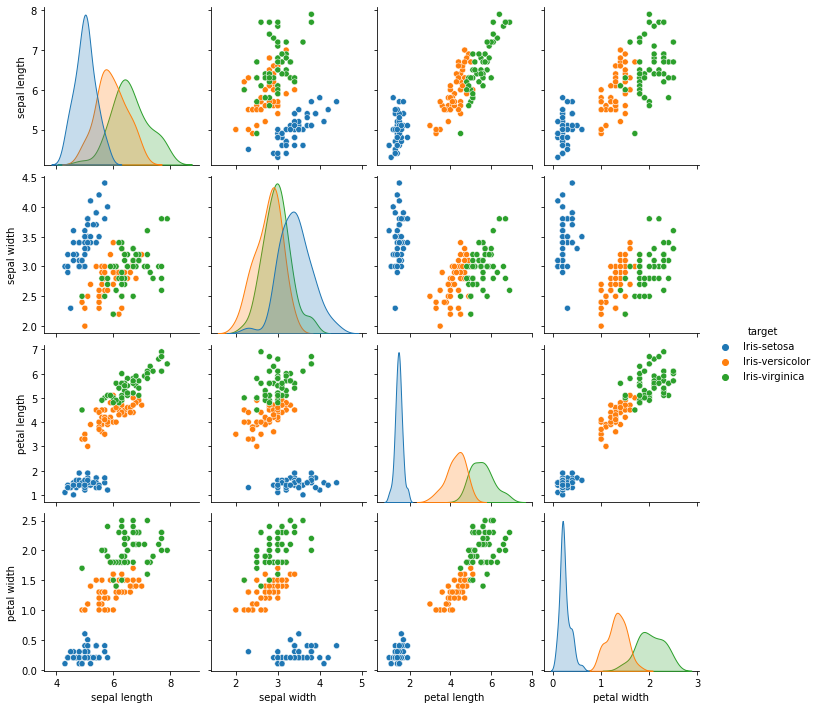

In [6]:
sns.pairplot(df_iris, hue='target')

You can immediately see that the features petal length and petal width are strongly correlated


### Standardize the Data

Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.


In [7]:
features_iris = ['sepal length', 'sepal width', 'petal length', 'petal width']
df_iris.loc()
x_iris = df_iris.loc[:, features_iris].values

In [8]:
y_iris = df_iris.loc[:,['target']].values

In [9]:
x_iris = StandardScaler().fit_transform(x_iris)

In [10]:
df_iris_standarize = pd.DataFrame(data = x_iris, columns = features_iris)
df_iris_standarize['target'] = df_iris['target']
df_iris_standarize.head(15)

,sepal length,sepal width,petal length,petal width,target
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa
5,-0.537178,1.957669,-1.170675,-1.050031,Iris-setosa
6,-1.506521,0.800654,-1.341272,-1.181504,Iris-setosa
7,-1.021849,0.800654,-1.284407,-1.312977,Iris-setosa
8,-1.748856,-0.356361,-1.341272,-1.312977,Iris-setosa
9,-1.143017,0.106445,-1.284407,-1.444450,Iris-setosa


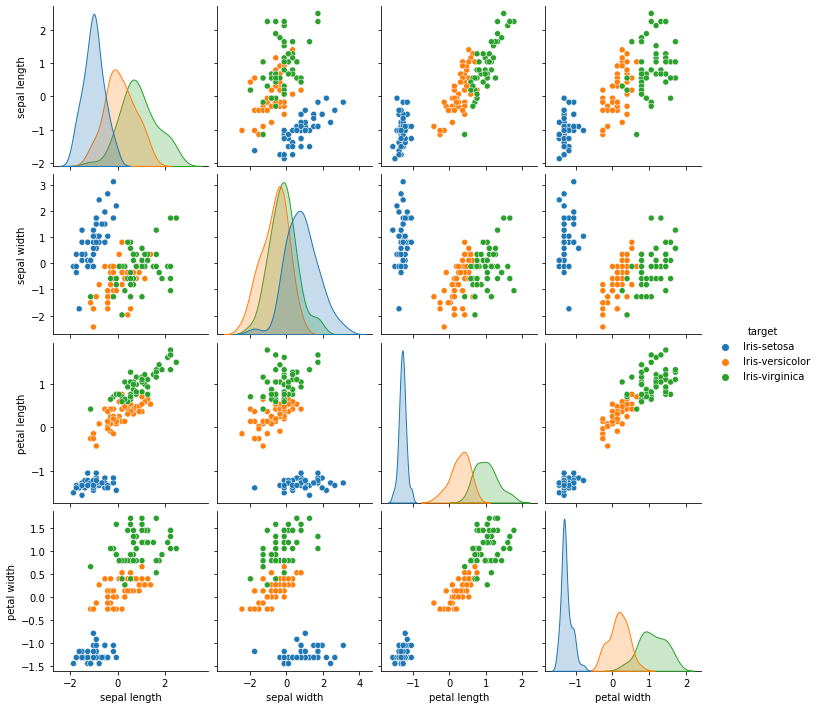

In [11]:
sns.pairplot(df_iris_standarize, hue='target')

We can see that the distributions are now standardized

### PCA Projection to 2D

In [12]:
pca_iris = PCA(n_components=2)

In [13]:
principalComponents_iris = pca_iris.fit_transform(x_iris)

In [14]:
principalDf_iris = pd.DataFrame(data = principalComponents_iris ,columns = ['principal component 1', 'principal component 2'])


In [15]:
finalDf_iris = pd.concat([principalDf_iris, df_iris[['target']]], axis = 1)
finalDf_iris.head(15)

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
5,-2.070537,1.518549,Iris-setosa
6,-2.445711,0.074563,Iris-setosa
7,-2.233842,0.247614,Iris-setosa
8,-2.341958,-1.095146,Iris-setosa
9,-2.188676,-0.448629,Iris-setosa



### Visualize 2D Projection

Use a PCA projection to 2d to visualize the entire data set. You should plot different classes using different colors or shapes.

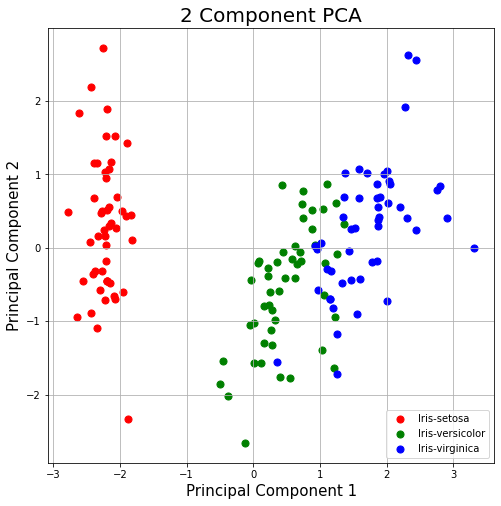

In [16]:
def PCA_visualization(targets, colors, final_df):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 Component PCA', fontsize = 20)

    for target, color in zip(targets,colors):
        indicesToKeep = final_df['target'] == target
        ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
                , final_df.loc[indicesToKeep, 'principal component 2']
                , c = color
                , s = 50)
    ax.legend(targets)
    ax.grid()

iris_targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

PCA_visualization(iris_targets, colors, finalDf_iris)

iris-setosa is linearry separablo from others class

### Explained Variance

The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [17]:
pca_iris.explained_variance_ratio_

array([0.72770452, 0.23030523])

Together, the first two principal components contain 95.80% of the information. The first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. The third and fourth principal component contained the rest of the variance of the dataset.

### limitations of PCA

* PCA is not scale invariant. check: we need to scale our data first.
    
* The directions with largest variance are assumed to be of the most interest

* Only considers orthogonal transformations (rotations) of the original variables
 
* PCA is only based on the mean vector and covariance matrix. Some distributions (multivariate normal) are characterized by this, but some are not.

* If the variables are correlated, PCA can achieve dimension reduction. If not, PCA just orders them according to their variances.




### Exercises - Perform PCA for breast cancer dataset

* You can find this dataset it in the scikit learn library, import it and convert to pandas dataframe, original label are '0' and '1' for better readability change these names to: 'benign' and 'malignant'

In [18]:
from sklearn.datasets import load_breast_cancer
data_cancer = load_breast_cancer()

In [19]:
data_cancer_target_names = ['benign' if elem == 0 else 'malignant' for elem in data_cancer.target]


* Visualizes correlations between pairs of features (due to the greater number of features use pandas corr () function instead of pairplot instead of seaborn heatmap ())

In [20]:
df_cancer = pd.DataFrame(data = data_cancer.data, columns=data_cancer.feature_names)
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


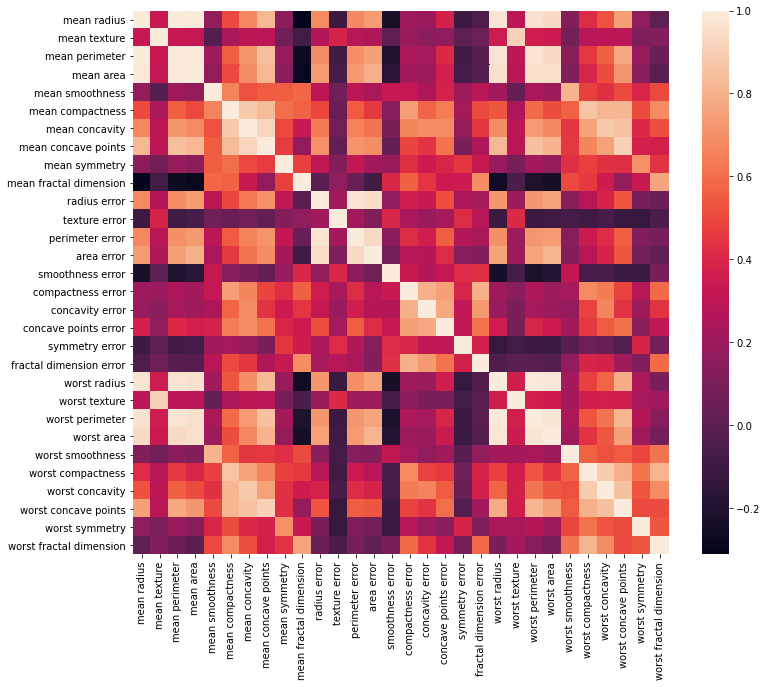

In [21]:
# correlation between pairs of feature
corr_cancer  = df_cancer.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_cancer, 
            xticklabels=corr_cancer.columns.values,
            yticklabels=corr_cancer.columns.values)
plt.show()

* Perform PCA and visualize the data

In [22]:
# standardize data
values_scaled = StandardScaler().fit_transform(df_cancer.values)
df_cancer_scaled = pd.DataFrame(values_scaled, columns=data_cancer.feature_names)

def perform_PCA(df, targets, components=2, print_df=True):
    pca = PCA(n_components=components)
    principal_components = pca.fit_transform(df.values)

    principal_df = pd.DataFrame(data = principal_components,
                                columns = ['principal component '+str(i+1) for i in range(components)])
    principal_df['target'] = targets

    if print_df:
        print(principal_df.head())
    
    return pca,principal_df

pca_cancer,principal_df_cancer = perform_PCA(df_cancer_scaled, data_cancer_target_names)

   principal component 1  principal component 2  target
0               9.192837               1.948583  benign
1               2.387802              -3.768172  benign
2               5.733896              -1.075174  benign
3               7.122953              10.275589  benign
4               3.935302              -1.948072  benign


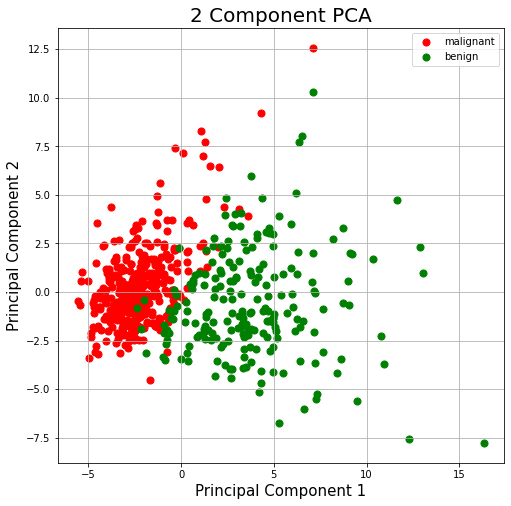

In [23]:
cancer_targets = data_cancer.target_names
colors = ['r', 'g']
PCA_visualization(cancer_targets, colors, principal_df_cancer)

* Examine  explained variance, draw a plot showing relation between total explained variance and number of principal components used


In [24]:
pca_cancer.explained_variance_ratio_

array([0.44272026, 0.18971182])

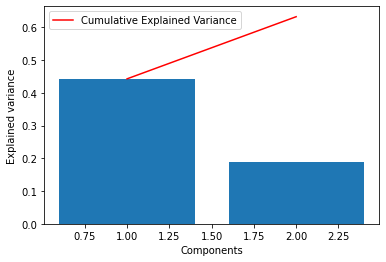

In [25]:
def explained_variance_plot(pcamodel):
    plt.bar(range(1,len(pcamodel.explained_variance_ratio_)+1),pcamodel.explained_variance_ratio_)
    plt.ylabel('Explained variance')
    plt.xlabel('Components')
    plt.plot(range(1,len(pcamodel.explained_variance_ratio_)+1),
            np.cumsum(pcamodel.explained_variance_ratio_),
            c='red',
            label="Cumulative Explained Variance")
    plt.legend(loc='upper left')

explained_variance_plot(pca_cancer)

* Use recursive feature elimination (available in scikit-learn module) or another feature ranking algorithm to split 30 features to on 15 "more important" and "less important" features. Then repeat the last step from the full data set - draw a plot showing relation between total explained variance and number of principal components used for all 3 cases. Explain the result briefly.

In [26]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
rfe_selector = RFE(estimator=estimator, n_features_to_select=15)
rfe_selector = rfe_selector.fit(df_cancer_scaled.values, data_cancer.target)

important_features = data_cancer.feature_names[rfe_selector.support_]
unimportant_features = data_cancer.feature_names[~rfe_selector.support_]

Explained variance ratio of important features: [0.60174563 0.19616355]


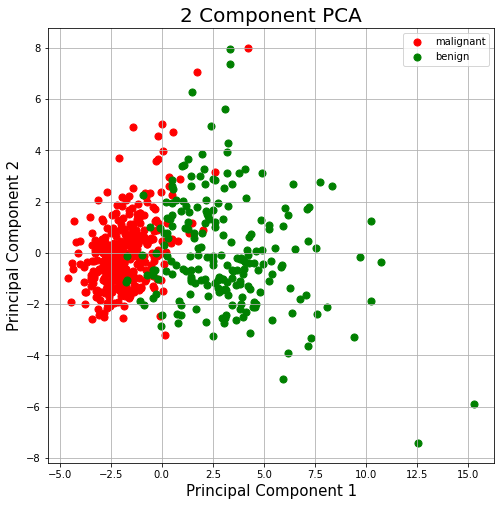

In [27]:
# PCA for important features 
pca_cancer_important,principal_df_cancer_important = perform_PCA(df_cancer_scaled[important_features], data_cancer_target_names, print_df=False)
print(f'Explained variance ratio of important features: {pca_cancer_important.explained_variance_ratio_}')
PCA_visualization(cancer_targets, colors, principal_df_cancer_important)

Explained variance ratio for important features: [0.60174563 0.19616355]


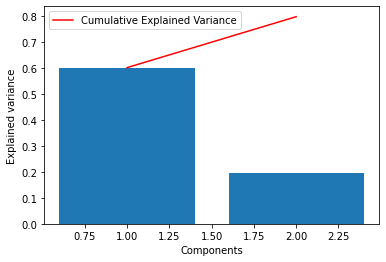

In [28]:
print(f'Explained variance ratio for important features: {pca_cancer_important.explained_variance_ratio_}')
explained_variance_plot(pca_cancer_important)

Explained variance ratio of important features: [0.34118613 0.19387923]


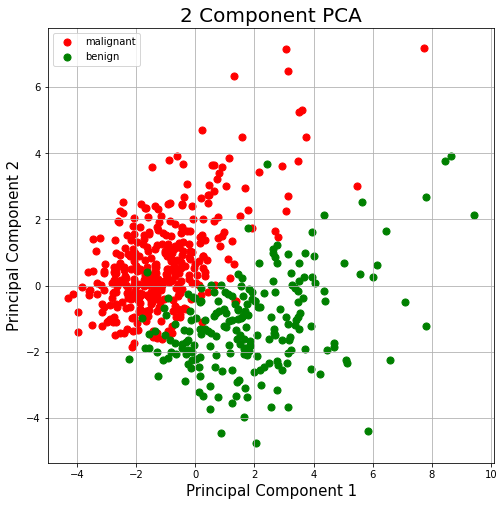

In [29]:
# PCA for unimportant features
pca_cancer_unimportant,principal_df_cancer_unimportant = perform_PCA(df_cancer_scaled[unimportant_features], data_cancer_target_names, print_df=False)
print(f'Explained variance ratio of important features: {pca_cancer_unimportant.explained_variance_ratio_}')
PCA_visualization(cancer_targets, colors, principal_df_cancer_unimportant)

Explained variance ratio for unimportant features: [0.34118613 0.19387923]


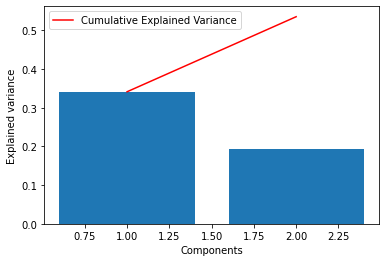

In [30]:
print(f'Explained variance ratio for unimportant features: {pca_cancer_unimportant.explained_variance_ratio_}')
explained_variance_plot(pca_cancer_unimportant)

Conclusions:<br>
- for dataset without feature elimination the first two principal components contain 63.24% of the information
- for dataset with 15 important features the first two principal components contain 79.78% of the information
- for dataset with 15 unimportant features the first two principal components contain 53.49% of the information

The highest cumulative explained variance ratio of 2 components was obtained from the 15 most important features.
These features are: 

In [31]:
important_features

array(['mean radius', 'mean perimeter', 'mean area', 'mean compactness',
       'mean concavity', 'mean concave points', 'radius error',
       'area error', 'concavity error', 'concave points error',
       'worst radius', 'worst area', 'worst smoothness',
       'worst compactness', 'worst fractal dimension'], dtype='<U23')

## Kernel PCA

PCA is a linear method. That is it can only be applied to datasets which are linearly separable. It does an excellent job for datasets, which are linearly separable. But, if we use it to non-linear datasets, we might get a result which may not be the optimal dimensionality reduction. Kernel PCA uses a kernel function to project dataset into a higher dimensional feature space, where it is linearly separable. It is similar to the idea of Support Vector Machines.

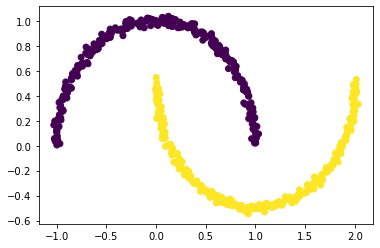

In [32]:
import matplotlib.pyplot as plt 
from sklearn.datasets import make_moons 
  
X, y = make_moons(n_samples = 500, noise = 0.02, random_state = 417) 
  
plt.scatter(X[:, 0], X[:, 1], c = y) 
plt.show() 


Let’s apply PCA on this dataset

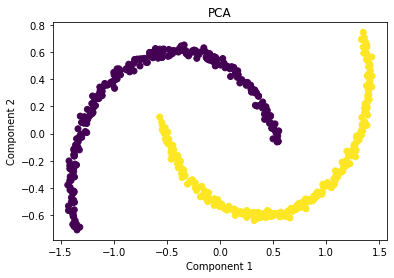

In [33]:
pca = PCA(n_components = 2) 
X_pca = pca.fit_transform(X) 
   
plt.title("PCA") 
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y) 
plt.xlabel("Component 1") 
plt.ylabel("Component 2") 
plt.show() 

PCA failed to distinguish the two classes

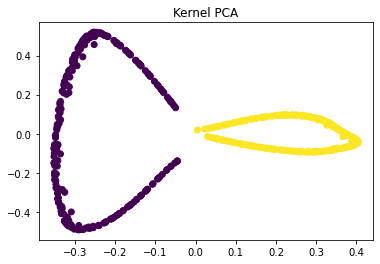

In [34]:
from sklearn.decomposition import KernelPCA 

kpca = KernelPCA(kernel ='rbf', gamma = 15) 
X_kpca = kpca.fit_transform(X) 

plt.title("Kernel PCA") 
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c = y) 
plt.show() 

Applying kernel PCA on this dataset with RBF kernel with a gamma value of 15


### KernelPCA exercises

* Visualize in 2d datasets used in this labs, experiment with the parameters of the KernelPCA method change kernel and gamma params. Docs: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html 

C:\Users\Vergenter\miniconda3\envs\workenv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


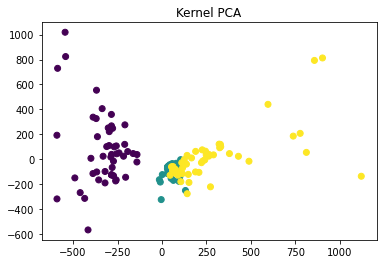

In [35]:
from sklearn.preprocessing import LabelEncoder

## IRIS dataset
# encode labels to numeric values
le = LabelEncoder()
y_iris_num = le.fit_transform(y_iris)

def apply_kernel_PCA(X, kernel_type, gamma,n_components=2):
    kpca_model = KernelPCA(n_components=n_components,kernel = kernel_type, gamma = gamma)
    kpca_model_transformed = kpca_model.fit_transform(X)
    return kpca_model, kpca_model_transformed

def perform_kernel_PCA(X, y, kernel_type, gamma):
    _,X_kpca_iris = apply_kernel_PCA(X,kernel_type, gamma)
#     visualize Kernel PCA 
    plt.title("Kernel PCA") 
    plt.scatter(X_kpca_iris[:, 0], X_kpca_iris[:, 1], c = y) 
    plt.show()

perform_kernel_PCA(x_iris, y_iris_num, 'poly', 10)

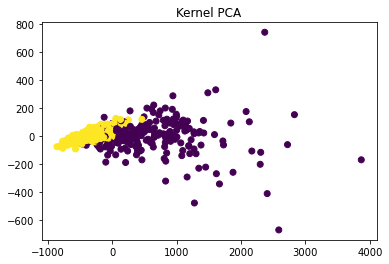

In [36]:
## Cancer dataset 
perform_kernel_PCA(df_cancer, data_cancer.target, 'linear', 100)

## Homework

* Download the MNIST data set (there is a function to load this set in libraries such as scikit-learn, keras). It is a collection of black and white photos of handwritten digits with a resolution of 28x28 pixels. which together gives 784 dimensions.

* Try to visualize this dataset using PCA and KernelPCA, don't expect full separation of the data

* Similar to the exercises, examine explained variance. draw explained variance vs number of principal Components plot.

* Find number of principal components for 99%, 95%, 90%, and 85% of explained variance.

* Draw some sample MNIST digits and from PCA of its images transform data back to its original space (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.inverse_transform). Make an inverse transformation for number of components coresponding with explained variance shown above and draw the reconstructed images. The idea of this exercise is to see visually how depending on the number of components some information is lost.

* Perform the same reconstruction using KernelPCA (make comparisons for the same components number)
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA.inverse_transform


Visualize

In [37]:
from keras.datasets import mnist
mnist_data = mnist.load_data(path="mnist.npz")

In [38]:
(x_train, y_train), (x_test, y_test) = mnist_data

In [39]:
np.shape(x_train)

(60000, 28, 28)

In [40]:
x_data = x_train[:2000]
y_data = y_train[:2000]
x_data_reshaped = x_data.reshape(-1, 28*28)
labels = np.array(["pixel"+str(i) for i in range(28*28)])
df_mnist = pd.DataFrame(data = x_data_reshaped, columns=labels)
# df_mnist['target']=y_data
#output df_mnist

In [41]:
#standarize data
values_scaled = StandardScaler().fit_transform(df_mnist.values)
df_mnist_scaled = pd.DataFrame(values_scaled, columns=df_mnist.columns)

In [42]:
#calculate PCA for 2 principal components
pca_components = 2
pca_mnist = PCA(n_components=pca_components)
pca_mnist_fitTransformed = pca_mnist.fit_transform(df_mnist_scaled)

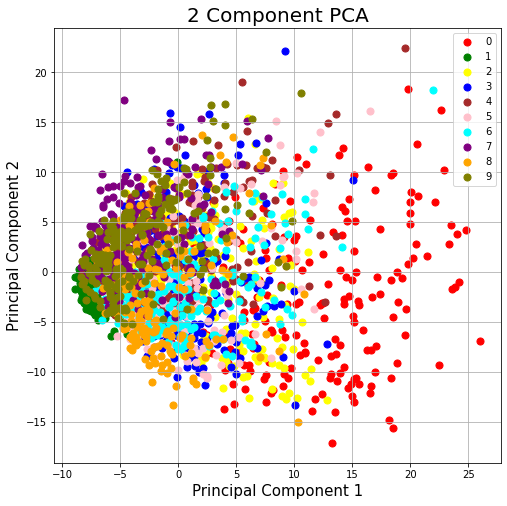

In [43]:
#visualize PCA result
principal_df_mnist = pd.DataFrame(data = pca_mnist_fitTransformed, columns = ['principal component 1','principal component 2'])
principal_df_mnist['target']=y_data
digits = [0,1,2,3,4,5,6,7,8,9]
colors = ['red','green',"yellow",'blue','brown','pink','cyan','purple','orange','olive']
PCA_visualization(digits, colors, principal_df_mnist)

In [44]:
#calculate kernel PCA
from sklearn.decomposition import KernelPCA 
kpca_components=2
gamma = 70
kpca_mnist = KernelPCA(n_components=kpca_components,kernel = 'rbf', gamma = gamma)
kpca_mnist_transformed = kpca_mnist.fit_transform(df_mnist_scaled)

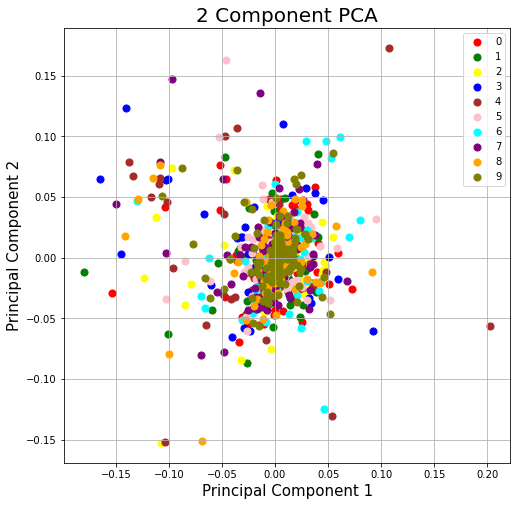

In [45]:
#visualize kernel PCA result
principal_df_mnist = pd.DataFrame(data = kpca_mnist_transformed, columns = ['principal component 1','principal component 2'])
principal_df_mnist['target']=y_data
digits = [0,1,2,3,4,5,6,7,8,9]
colors = ['red','green',"yellow",'blue','brown','pink','cyan','purple','orange','olive']
PCA_visualization(digits, colors, principal_df_mnist)

Explained variance

In [46]:
#explained variance ratio for PCA
pca_mnist.explained_variance_ratio_
print(np.sum(pca_mnist.explained_variance_ratio_))

0.11099924586076837


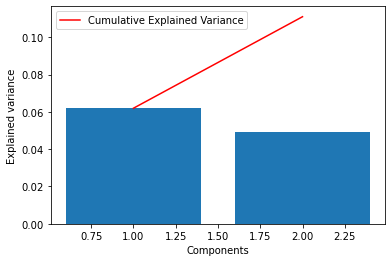

In [47]:
explained_variance_plot(pca_mnist)

In [48]:
#define how kernelpca is calculated
def kernel_pca_explained_variance(transformed):
    return np.var(transformed, axis=0)

In [49]:
#explained variance ratio
kpca_explained_variance_ratio_ = kernel_pca_explained_variance(kpca_mnist_transformed)
print(np.sum(kpca_explained_variance_ratio_))

0.0010000000000000013


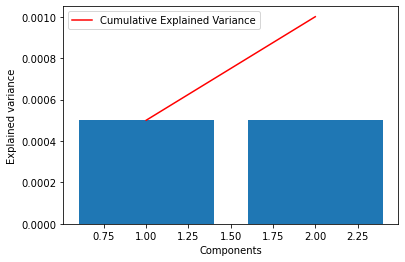

In [50]:
explained_variance_plot(type('obj', (object,), {'explained_variance_ratio_' : kpca_explained_variance_ratio_}))

Find number of principal components

In [51]:
#calculate PCA
pca_components = 500
pca_mnist = PCA(n_components=pca_components)
pca_mnist_fitTransformed = pca_mnist.fit_transform(df_mnist_scaled)

In [52]:
def findItems(listOfNumbers,data):
    return np.array([next(x for x,val in enumerate(data) if val > num) for num in listOfNumbers ]) 

In [53]:
#explained variance ratio for PCA
pca_mnist.explained_variance_ratio_
pca_cumsum=np.cumsum(pca_mnist.explained_variance_ratio_)
pca_principal_to_variance={i:pca_cumsum[i] for i in findItems([0.85,0.9,0.95,0.99],pca_cumsum)}
print(pca_principal_to_variance)

{122: 0.8501653828509957, 161: 0.9009769808130993, 232: 0.9502719561294908, 411: 0.9900648516705189}


In [54]:
#check for inflation
for principal_count in pca_principal_to_variance.keys():
    test_pca_mnist = PCA(n_components=principal_count)
    test_pca_mnist_fitTransformed = test_pca_mnist.fit_transform(df_mnist_scaled)
    print(np.sum(test_pca_mnist.explained_variance_ratio_))

0.8473313849899271
0.8991789632286498
0.9493862806254264
0.989808920025113


In [55]:
#get correct values
def pcaFun(n_components,data):
    l_pca_data = PCA(n_components=n_components)
    l_pca_data_transformed = l_pca_data.fit_transform(data)
    return l_pca_data,l_pca_data_transformed
#get correct values
pca_idices = [124,162,234,413] # diff by [2,1,2,2]
pca_for_special_explained_variance = {i:pcaFun(i,df_mnist_scaled) for i in pca_idices}
test_pca_explained_variance_ratio_ = [sum(data.explained_variance_ratio_) for _,(data,_) in pca_for_special_explained_variance.items()]
print(test_pca_explained_variance_ratio_)

[0.8505722929812028, 0.9002423110894797, 0.9503326455128428, 0.9899984313531396]


In [56]:
#calculate kernel PCA
kpca_components= 2000
gamma = 57
kpca_mnist = KernelPCA(n_components=kpca_components,kernel = 'rbf', gamma = gamma)
kpca_mnist_transformed = kpca_mnist.fit_transform(df_mnist_scaled)

In [57]:
#explained variance ratio for kernel PCA
kpca_explained_variance_ratio_ = kernel_pca_explained_variance(kpca_mnist_transformed)
kpca_cumsum=np.cumsum(kpca_explained_variance_ratio_)
print(kpca_cumsum)
kpca_principal_to_variance = {i:kpca_cumsum[i] for i in findItems([0.85,0.9,0.95,0.99],kpca_cumsum)}
print(kpca_principal_to_variance)

[5.000e-04 1.000e-03 1.500e-03 ... 9.990e-01 9.995e-01 9.995e-01]
{1700: 0.8504999999999618, 1800: 0.9004999999999563, 1900: 0.9504999999999508, 1980: 0.9904999999999464}


In [58]:
#check for inflation
for principal_count in kpca_principal_to_variance.keys():
    gamma = 57
    test_kpca_mnist = KernelPCA(n_components=principal_count,kernel = 'rbf', gamma = gamma)
    test_kpca_mnist_transformed = test_kpca_mnist.fit_transform(df_mnist_scaled)
    test_kpca_explained_variance_ratio_ = kernel_pca_explained_variance(test_kpca_mnist_transformed)
    print(np.sum(test_kpca_explained_variance_ratio_))

0.8500000000000001
0.9
0.95
0.9899999999999998


In [66]:
def kpcaFun(n_components,data,gamma=57):
    l_kpca = KernelPCA(n_components=n_components,kernel = 'rbf', gamma = gamma, fit_inverse_transform=True)
    kpca_data_transformed = l_kpca.fit_transform(data)
    return l_kpca,kpca_data_transformed
#get correct values
kpca_indices = [1701,1801,1901,1981] # diff by [1,1,1,1]
kpca_for_special_explained_variance = {i:kpcaFun(i,df_mnist_scaled) for i in kpca_indices}
test_kpca_explained_variance_ratio_ = [sum(kernel_pca_explained_variance(data)) for (_,(_,data)) in kpca_for_special_explained_variance.items()]
print(test_kpca_explained_variance_ratio_)

[0.8504999999999625, 0.9004999999999568, 0.9504999999999509, 0.9904999999999468]


inverse transform

In [67]:
#plot function
from math import ceil 
def plotImages(data,columns):
    fig = plt.figure(figsize=(20, 20))
    items = len(data)
    ax=[]
    rows = ceil(items/columns)
    plt.gray()
    for i in range(items):
        ax.append( fig.add_subplot(rows, columns, i+1) )
        ax[-1].set_title("ax:"+str(i))  # set title
        plt.imshow(data[i])
    plt.show() 

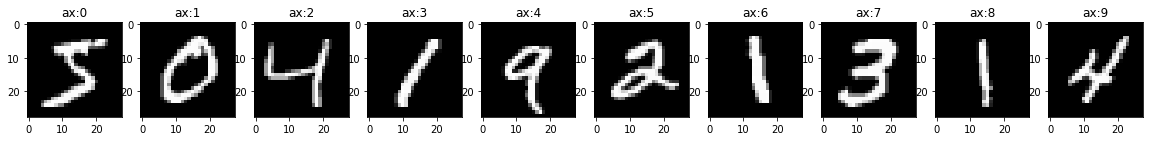

In [68]:
plotImages(x_data[:10],10)

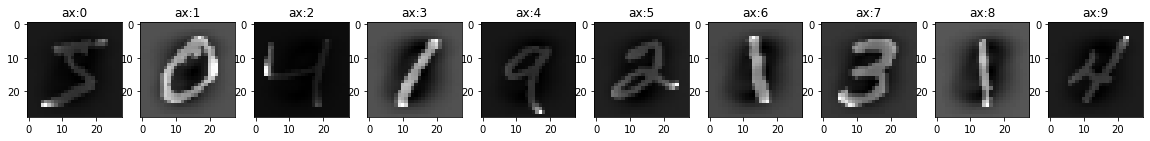

In [69]:
scaled_img_data=values_scaled[:10].reshape(-1,28,28)
plotImages(scaled_img_data,10)

124


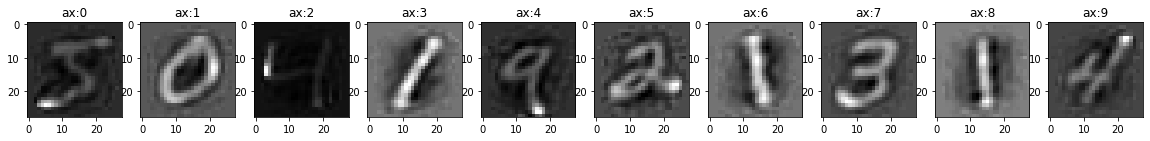

162


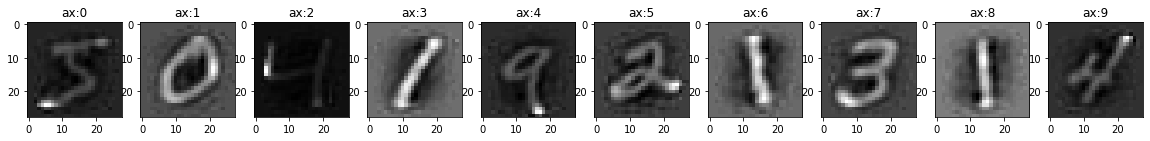

234


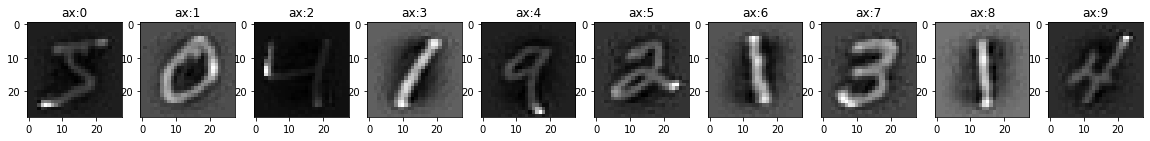

413


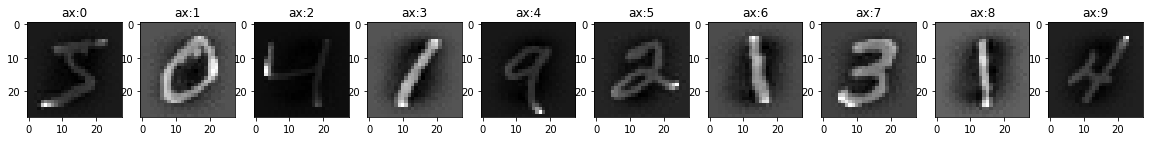

In [70]:
pca_for_special_explained_variance # number of : method,transformed
for (lines,(method,transformed)) in pca_for_special_explained_variance.items():
    print(lines)
    img_data = method.inverse_transform(transformed)[:10].reshape(-1,28,28)
    plotImages(img_data[:10],10)

1701


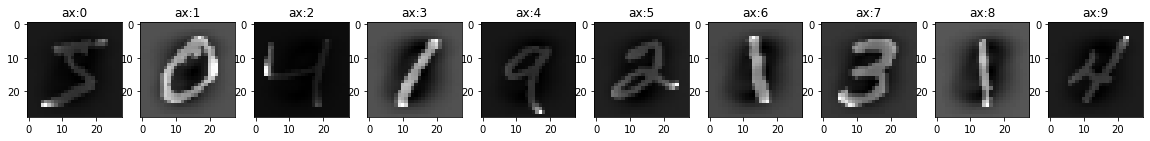

1801


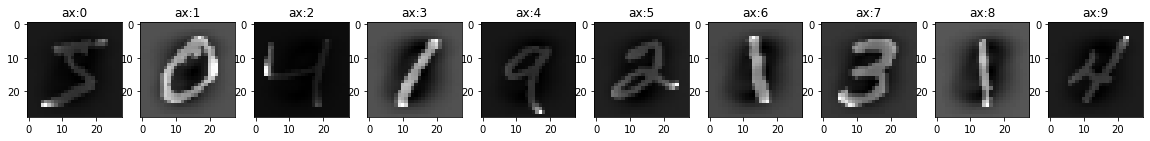

1901


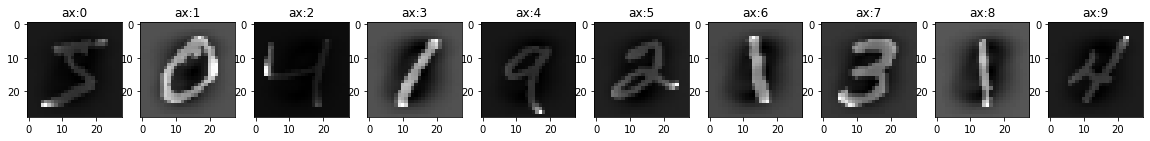

1981


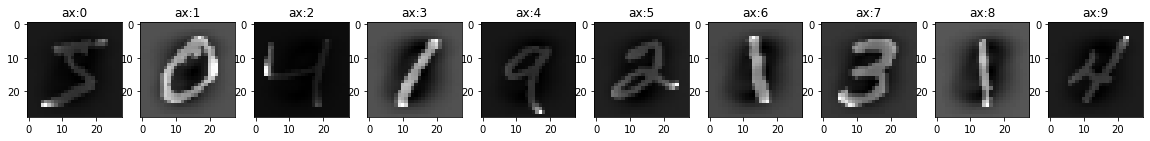

In [71]:
pca_for_special_explained_variance # number of : method,transformed
for (lines,(method,transformed)) in kpca_for_special_explained_variance.items():
    print(lines)
    img_data = method.inverse_transform(transformed)[:10].reshape(-1,28,28)
    plotImages(img_data[:10],10)

## Useful links
https://scikit-learn.org
https://towardsdatascience.com/introduction-to-principal-component-analysis-pca-with-python-code-69d3fcf19b57
https://towardsdatascience.com/kernel-pca-vs-pca-vs-ica-in-tensorflow-sklearn-60e17eb15a64